<a href="https://colab.research.google.com/github/bkim9/Resume/blob/main/12_9_Adadelta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install d2l==1.0.3
!pip install -U mxnet-cu112==1.9.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 MB 2.1 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1


In [ ]:
%matplotlib inline
import torch
from d2l import torch as d2l

def init_adadelta_states(featuer_dim):
  s_w, s_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
  delta_w, delta_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
  return ((s_w, delta_w), (s_b, delta_b))

def adadelta(params, states, hyperparams):
  rho, eps = hyperparams['rho'], 1e-5
  for p, (s, delta) in zip(params, states):
    with torch.no_grad():
      s[:] = rho * s + (1-rho) * torch.square(p.grad)
      g = (torch.sqrt(delta + eps) / torch.sqrt(s + eps)) * p.grad
      p[:] -= g
      delta[:] = rho * delta + (1-rho) * g * g
    p.grad.data.zero_()

loss: 0.243, 0.419 sec/epoch


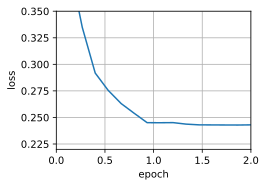

In [ ]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(adadelta, init_adadelta_states(feature_dim), {'rho': 0.9}, data_iter, feature_dim);

loss: 0.243, 0.289 sec/epoch


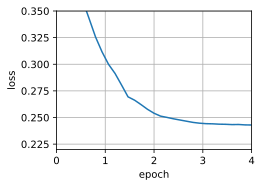

In [ ]:
trainer = torch.optim.Adadelta
d2l.train_concise_ch11(trainer, {'rho': 0.9}, data_iter)